# 2. Simple Linear Regression
- 단순 선형 회귀라고도 부르며, 가장 단순하기 때문에 가장 기본이 되는 회귀 알고리즘이다.
- 하나의 종속 변수 $y$에 대해 하나의 독립 변수 $x$를 가지는 모델이며, 식으로는 $y=ax+b$또는 $H(x)=Wx+b$로 나타낸다.
- 데이터들을 대변하는 하나의 선(가설 함수)을 $H(x)$으로 표현하였을 때, $H(x)-y$를 $Cost$ or $Loss$ or $Error$라고 부른다
- 얼마나 데이터들을 잘 대변했는지를 측정하는 비용 함수를 정의하는 방법은 여러 가지 있으며, 대표적으로는 $cost(W,b) = {1 \over m}\sum_{i=1}^m (H(x_i)-y_i)^2$로 정의한다.

In [1]:
import tensorflow as tf
import numpy as np
tf.__version__

'2.13.0'

(0.0, 8.0)

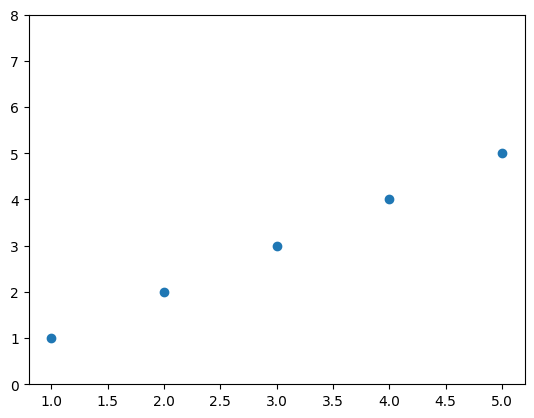

In [10]:
import matplotlib.pyplot as plt

x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

- _tf.reduce_mean_: Computes the mean of elements across dimensions of a tensor.
- _tf.square_: Computes square of x element-wise.


In [12]:
v =[1., 2., 3., 4.]
tf.reduce_mean(v), tf.square(3)

(<tf.Tensor: shape=(), dtype=float32, numpy=2.5>,
 <tf.Tensor: shape=(), dtype=int32, numpy=9>)

- _tf.Variable_: A variable maintains shared, persistent state manipulated by a program. (해당 변수는 프로그램이 조작하는 공유 지속 상태를 유지합니다.)

In [13]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [26]:
# numpy array로 변환
W.numpy(), b.numpy()

(2.0, 0.5)

- hypothesis는 계산에 사용된 W, b와 다른 타입을 가짐 (각각 EagerTensor, ResourceVariable)

In [24]:
type(hypothesis), type(W)

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.ops.resource_variable_ops.ResourceVariable)

- $ cost = {1 \over m}\sum_{i=1}^m (H(x_i)-y_i)^2$

In [27]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

## Gradient descent (경사하강법)
- 함수의 기울기(경사)를 구한 뒤, 경사의 반대 방향으로 iterative하게 이동시켜 extreme point(극값)을 찾는 방법이다.
- 이는 딥러닝 학습 시 사용되는 최적화 방법 중 하나이지만, Global이 아닌 local extrema point에 수렴할 수 있으며 학습률에 따라 발산 또는 긴 수렴 시간을 가지는 등의 문제점이 있다.

- tf.GradientTape(persistent=False, watch_accessed_variables=True)<br>
=> Record operations for _automatic differentiation_ (자동 미분)<br>
=> Operations are recorded if they are executed within this context manager and 
at least one of their inputs is being  "watched". (작업이 이 컨텍스트 관리자 내에서 실행되고 입력 중 하나 이상이 "관측"되는 경우 기록됩니다.).<br>
=> 중간 연산 과정을 tape에 저장하고 이후 gradient를 연산하도록 지원한다.

In [21]:
from inspect import getsource
print(getsource(tf.GradientTape))

@tf_export("GradientTape", "autodiff.GradientTape", v1=["GradientTape"])
class GradientTape:
  """Record operations for automatic differentiation.

  Operations are recorded if they are executed within this context manager and
  at least one of their inputs is being "watched".

  Trainable variables (created by `tf.Variable` or `tf.compat.v1.get_variable`,
  where `trainable=True` is default in both cases) are automatically watched.
  Tensors can be manually watched by invoking the `watch` method on this context
  manager.

  For example, consider the function `y = x * x`. The gradient at `x = 3.0` can
  be computed as:

  >>> x = tf.constant(3.0)
  >>> with tf.GradientTape() as g:
  ...   g.watch(x)
  ...   y = x * x
  >>> dy_dx = g.gradient(y, x)
  >>> print(dy_dx)
  tf.Tensor(6.0, shape=(), dtype=float32)

  GradientTapes can be nested to compute higher-order derivatives. For example,

  >>> x = tf.constant(5.0)
  >>> with tf.GradientTape() as g:
  ...   g.watch(x)
  ...   with tf.G

- 경사하강법을 **한 번** 수행

In [34]:
# 경사하강법을 한 번 수행
learning_rate = 0.01

W = tf.Variable(2.0)
b = tf.Variable(0.5)

with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

print(f'경사하강법 전: W={W.numpy()}, b={b.numpy()}')

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

print(f'경사하강법 한 번 실행: W={W.numpy()}, b={b.numpy()}')

경사하강법 전: W=2.0, b=0.5
경사하강법 한 번 실행: W=1.75, b=0.4300000071525574


- 경사하강법을 **여러 번** 수행

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059
   99|    1.0048|   -0.0174|  0.000055


(0.0, 8.0)

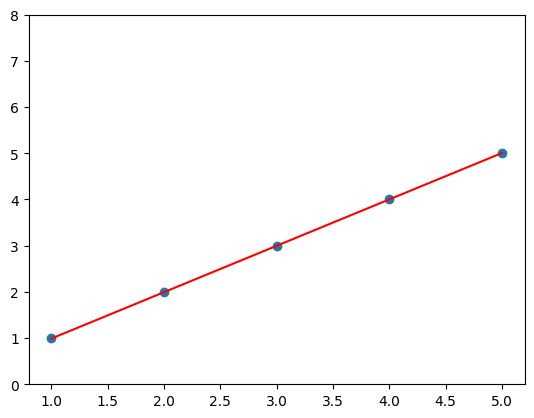

In [45]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# 경사하강법 100번 수행
for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    # 10번 돌 때마다 W, b 값 확인
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

# 경사하강법을 100번 수행한 W, b
print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

## with 구문
- open 등의 메소드로 파일을 열어 작업을 수행하였다면 반드시 close() 등의 메소드를 통해 파일을 닫아주어야만 하며, 만약 그렇지 않을 시 파일 리소스가 메모리를 계속 점유하게 된다.
- 이는 자원 관리 측면에서 매우 비효율적이기 때문에 파이썬은 with 구문을 통해 이러한 문제를 해결하고자 하였다.
- with 구문을 사용하면 파일 작업 이후 리소스의 메모리 점유를 삭제하므로 자원이 관리되며, open 메소드 이후 발생하는 예외에 대해서도 대처 가능하다.
- with 구문은 작업의 실행을 컨텍스트 관리자가 정의한 메소드로 감싸는 역할을 하며, try-except-finally 사용 패턴을 편리하게 재사용할 수 있도록 캡슐화한다.
- 러프하게 본다면 with 구문으로 작업을 수행할 시 컨텍스트 관리자에서 정의한 \_\_enter\_\_가 먼저 호출되고, 그 다음 작업이 수행되며, 작업 이후에는 \_\_exit\_\_가 호출되며 예외 발생 시 \_\_exit\_\_의 인자로 전달된다.
- with 설명(파이썬 공식 문서): https://docs.python.org/ko/3/reference/compound_stmts.html#the-with-statement, https://peps.python.org/pep-0343/
- 컨텍스트 관리자(파이썬 공식 문서): https://docs.python.org/ko/3/reference/datamodel.html#context-managers, https://docs.python.org/ko/3/library/stdtypes.html#typecontextmanager

### with 구문에 사용할 class를 구현

In [36]:
class With:
    def __init__(self):
        self.execute = "작업 시작"
    
    def __enter__(self):
        print(self.execute)
        return self

    def printText(self):
        print("작업 수행")

    def __exit__(self, exc_type, exc_val, exc_tb):
        print('작업 종료')

#객체 생성 및 with 구문 실행
withclass = With()

with withclass as wc:
    wc.printText()

작업 시작
작업 수행
작업 종료


#### 예외 발생 시
- 작업 수행 시 예외가 발생하더라도 \_\_exit\_\_가 실행된다 -> 예외가 발생하더라도 파일을 닫아 리소스를 제거할 수 있다 -> 코드 안정성 확보

In [5]:
class With:
    def __init__(self):
        self.execute = "작업 시작"
    
    def __enter__(self):
        print(self.execute)
        return self

    def printText(self):
        raise Exception('작업 불량')

    def __exit__(self, exc_t, exc_v, exc_tb):
        print('작업 종료')

#객체 생성 및 with 구문 실행
withclass = With()

with withclass as wc:
    wc.printText()

작업 시작
작업 종료


Exception: 작업 불량

## tensorflow 공식 문서 내 with가 사용된 예제

In [40]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

# 3. Multi-variable Linear Regression
- 다중 선형 회귀라고도 부르며, 하나의 종속 변수 $y$에 대해 여러 독립 변수 $x_i$를 가지는 모델로 식으로는 $H(x)=WX+b$로 나타낸다.

## Cost function

### Cost function in python

In [8]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15):
    # np.linspace(-3, 5, num=15) -> -3 ~ 5사이에 15개의 숫자를 채워넣음
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


numpy.linspace
- **Docstring**: Return evenly spaced numbers over a specified interval.

In [7]:
np.linspace(-3, 5, num=15)

array([-3.        , -2.42857143, -1.85714286, -1.28571429, -0.71428571,
       -0.14285714,  0.42857143,  1.        ,  1.57142857,  2.14285714,
        2.71428571,  3.28571429,  3.85714286,  4.42857143,  5.        ])

### Cost function in TensorFlow

In [8]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### W에 따른 Cost(W) 

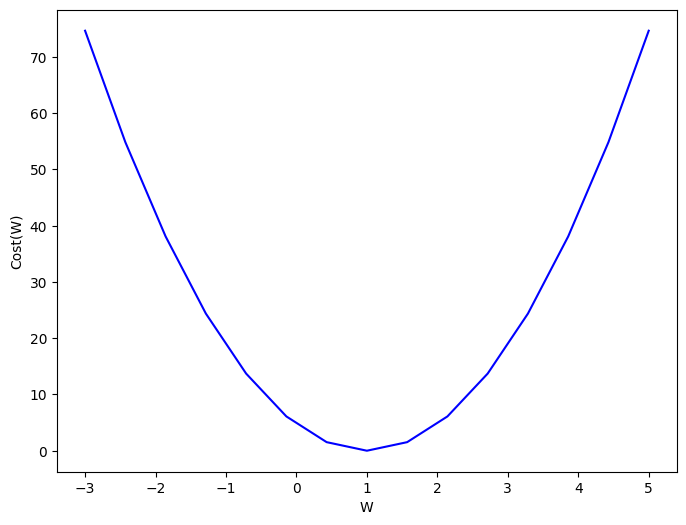

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

## Gradient descent algorithm in multi-variable linear regression

다음의 비용 함수에서, $m$을 $2m$으로 바꾼다하더라도 cost 계산 및 최소화 과정에 영향이 없으며 제곱을 미분할 때 공식이 단순화되는 효과가 있다. 따라서 *Formal definition*에서 $cost(W)$를 정의할 때 $m$ 대신 $2m$을 대입한 공식을 사용한다.
\begin{align} cost(W,b) = {1 \over m}\sum_{i=1}^m (Wx_i-y_i)^2 \end{align} 

## Formal definition
\begin{equation}
cost(W,b) = {1 \over 2m}\sum_{i=1}^m (Wx_i-y_i)^2
\end{equation}
\begin{equation}
W := W - \alpha{\partial \over \partial W}cost(W) 
\end{equation}
$W$ = $W$ - 변화량<br>
변화량 = 현 $W$에서의 비용곡선 기울기 $*$ $\alpha$<br>
$\alpha$ = *learning late*

## Formal definition (continue)
\begin{equation}
W := W - \alpha{\partial \over \partial W}{1 \over 2m}\sum_{i=1}^m (Wx_i-y_i)^2 
\end{equation}
\begin{equation}
W := W - \alpha{1 \over 2m}\sum_{i=1}^m 2(Wx_i-y_i)x_i
\end{equation}
\begin{equation}
W := W - \alpha{1 \over m}\sum_{i=1}^m (Wx_i-y_i)x_i
\end{equation}
$W$ = $W$ - 변화량<br>
변화량 = 현 $W$에서의 비용곡선 기울기 $*$ $\alpha$<br>
$\alpha$ = *learning late*

## Gradient descent algorithm
\begin{equation}
W := W - \alpha{1 \over m}\sum_{i=1}^m (Wx_i-y_i)x_i
\end{equation}

- **:=** (바다코끼리 연산자): 할당(binding)과 동시에 return

## Gradient descent 구현

In [5]:
# 랜덤 시드 고정
# tf.set_random_seed(0)  # for reproducibility
tf.random.set_seed(0)

In [11]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100., 100.))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 369568.2812 | -267.280273
   10 | 142098.7500 | -165.355255
   20 | 54636.8750 | -102.153580
   30 | 21007.8379 | -62.963478
   40 |  8077.4995 | -38.662479
   50 |  3105.7939 | -23.593918
   60 |  1194.1759 | -14.250199
   70 |   459.1598 |  -8.456345
   80 |   176.5466 |  -4.863691
   90 |    67.8821 |  -2.635958
  100 |    26.1006 |  -1.254585
  110 |    10.0357 |  -0.398023
  120 |     3.8587 |   0.133113
  130 |     1.4837 |   0.462461
  140 |     0.5705 |   0.666683
  150 |     0.2193 |   0.793317
  160 |     0.0843 |   0.871840
  170 |     0.0324 |   0.920530
  180 |     0.0125 |   0.950722
  190 |     0.0048 |   0.969444
  200 |     0.0018 |   0.981053
  210 |     0.0007 |   0.988251
  220 |     0.0003 |   0.992715
  230 |     0.0001 |   0.995483
  240 |     0.0000 |   0.997199
  250 |     0.0000 |   0.998263
  260 |     0.0000 |   0.998923
  270 |     0.0000 |   0.999332
  280 |     0.0000 |   0.999586
  290 |     0.0000 |   0.999743


In [10]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


# Matrix multiplication

## dot product(=scalar product, 내적)

# Multi-feature regression

## Hypothesis
\begin{equation}
H(x) = wx+b
\end{equation}
\begin{equation}
H(x_1, ..., x_n) = w_1x_1 + ... + w_nx_n + b
\end{equation}
- 지금까지 다룬 Multi-variable과 다른 점은, $W$가 하나의 값을 가지지 않고 $n$개의 $w_i$를 가진다는 점이다.

## Simple Example

### 2 variable

In [13]:
x1_data = [1, 0, 3, 0, 5]
x2_data = [0, 2, 0, 4, 0]
y_data  = [1, 2, 3, 4, 5]

W1 = tf.Variable(tf.random.uniform([1], -10.0, 10.0))
W2 = tf.Variable(tf.random.uniform([1], -10.0, 10.0))
b  = tf.Variable(tf.random.uniform([1], -10.0, 10.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = W1 * x1_data + W2 * x2_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
          i, cost.numpy(), W1.numpy()[0], W2.numpy()[0], b.numpy()[0]))

    0 | 966.489624 |    -6.3849 |    -9.6386 |  -1.997182
   50 | 290.719482 |    -2.5520 |    -6.0406 |   0.083186
  100 |  97.416336 |    -0.8520 |    -3.7830 |   1.185548
  150 |  36.060600 |    -0.1155 |    -2.3524 |   1.777458
  200 |  14.622516 |     0.1927 |    -1.4381 |   2.096439
  250 |   6.551729 |     0.3151 |    -0.8494 |   2.265759
  300 |   3.350713 |     0.3601 |    -0.4675 |   2.350938
  350 |   2.032307 |     0.3750 |    -0.2176 |   2.387711
  400 |   1.469417 |     0.3797 |    -0.0524 |   2.396086
  450 |   1.216593 |     0.3823 |     0.0583 |   2.387553
  500 |   1.092846 |     0.3854 |     0.1338 |   2.368865
  550 |   1.023482 |     0.3899 |     0.1865 |   2.344070
  600 |   0.977404 |     0.3956 |     0.2244 |   2.315640
  650 |   0.941599 |     0.4023 |     0.2527 |   2.285101
  700 |   0.910600 |     0.4097 |     0.2748 |   2.253407
  750 |   0.882098 |     0.4175 |     0.2927 |   2.221159
  800 |   0.855110 |     0.4255 |     0.3080 |   2.188733
  850 |   0.82

### with Matrix

In [82]:
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform([1, 2], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

learning_rate = tf.Variable(0.001)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data) + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

        W_grad, b_grad = tape.gradient(cost, [W, b])
        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)
    
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.6f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

    0 |   5.769839 |     0.3661 |    -0.2659 |   0.788406
   50 |   2.157725 |     0.5734 |     0.0667 |   0.926181
  100 |   0.946475 |     0.6632 |     0.2795 |   0.996021
  150 |   0.501840 |     0.7014 |     0.4170 |   1.029126
  200 |   0.326270 |     0.7175 |     0.5069 |   1.041886
  250 |   0.252195 |     0.7247 |     0.5665 |   1.043127
  300 |   0.218308 |     0.7286 |     0.6066 |   1.037728
  350 |   0.200848 |     0.7315 |     0.6342 |   1.028455
  400 |   0.190266 |     0.7344 |     0.6537 |   1.016918
  450 |   0.182646 |     0.7374 |     0.6680 |   1.004070
  500 |   0.176359 |     0.7406 |     0.6789 |   0.990489
  550 |   0.170724 |     0.7440 |     0.6875 |   0.976528
  600 |   0.165453 |     0.7475 |     0.6947 |   0.962407
  650 |   0.160421 |     0.7510 |     0.7009 |   0.948262
  700 |   0.155575 |     0.7546 |     0.7065 |   0.934180
  750 |   0.150889 |     0.7582 |     0.7116 |   0.920212
  800 |   0.146349 |     0.7618 |     0.7164 |   0.906394
  850 |   0.14

## Hypothesis without b
\begin{equation}
H(x_1, ..., x_n) = w_1x_1 + w_2x_2 + w_3x_3 + b
\end{equation}
\begin{equation}
 = b + w_1x_1 + w_2x_2 + w_3x_3
\end{equation}

\begin{equation}
=
\begin{pmatrix}
b & x_1 & x_2 & x_3 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
1 \\
w_1 \\
w_2 \\
w_3
\end{pmatrix}
\end{equation}

- tf.train.<span style="color:skyblue">**GradientDescentOptimizer**</span>(learning_rate) -> 텐서플로우 2.0으로 업데이트되면서 사라짐
- tf.keras.<span style="color:skyblue">**optimizers.SGD**</span>(learning_rate)로 대체ts.

- tf.keras.<span style="color:skyblue">**optimizers.SGD**</span>(learning_rate)<br>Gradient descent (with momentum) optimizer. 
Update rule for parameter `w` with gradient `g` when `momentum` is 0

In [88]:
import tensorflow as tf

# 앞의 코드에서 bias(b)를 행렬에 추가
x_data = [
    [1., 1., 1., 1., 1.], # bias(b)
    [1., 0., 3., 0., 5.], 
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.uniform([1, 3], -1.0, 1.0)) # [1, 3]으로 변경하고, b 삭제

learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = tf.matmul(W, x_data)
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(grads_and_vars=zip(grads,[W]))
    if i % 50 == 0:
        print("{:5} | {:10.6f} | {:10.4f} | {:10.4f} | {:10.4f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], W.numpy()[0][2]))

    0 |  15.424617 |    -0.5626 |     0.3981 |    -0.2507
   50 |   0.000958 |    -0.0140 |     1.0048 |     0.9904
  100 |   0.000015 |    -0.0091 |     1.0024 |     1.0027
  150 |   0.000011 |    -0.0078 |     1.0020 |     1.0024
  200 |   0.000008 |    -0.0067 |     1.0017 |     1.0021
  250 |   0.000006 |    -0.0057 |     1.0015 |     1.0018
  300 |   0.000004 |    -0.0049 |     1.0013 |     1.0015
  350 |   0.000003 |    -0.0042 |     1.0011 |     1.0013
  400 |   0.000002 |    -0.0036 |     1.0009 |     1.0011
  450 |   0.000002 |    -0.0031 |     1.0008 |     1.0010
  500 |   0.000001 |    -0.0027 |     1.0007 |     1.0008
  550 |   0.000001 |    -0.0023 |     1.0006 |     1.0007
  600 |   0.000001 |    -0.0020 |     1.0005 |     1.0006
  650 |   0.000001 |    -0.0017 |     1.0004 |     1.0005
  700 |   0.000000 |    -0.0014 |     1.0004 |     1.0005
  750 |   0.000000 |    -0.0012 |     1.0003 |     1.0004
  800 |   0.000000 |    -0.0011 |     1.0003 |     1.0003
  850 |   0.00

## Predicting exam score

In [84]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001
# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 75475.8672
  100 |    74.2499
  200 |    64.6160
  300 |    64.2665
  400 |    63.9203
  500 |    63.5757
  600 |    63.2334
  700 |    62.8924
  800 |    62.5536
  900 |    62.2165
 1000 |    61.8813
 1100 |    61.5478
 1200 |    61.2163
 1300 |    60.8863
 1400 |    60.5584
 1500 |    60.2319
 1600 |    59.9077
 1700 |    59.5848
 1800 |    59.2638
 1900 |    58.9444
 2000 |    58.6269


quiz 1: 50점
quiz 2: 40점
mid 1: 60점
최종 점수는?

In [87]:
predict([[50.,40.,60.]]).numpy()

array([[82.57225]], dtype=float32)

# Logistic Regression (Classification)<br>- Eager Execution

- 로지스틱 회귀: 독립 변수들을 통해 True/False와 같은 이진 분류 확률을 추정하는 함수로, 결과가 확률이기 때문에 종속 변수는 0과 1 사이에 있다.
- 결과를 확률로 나타낸 후, 시그모이드 함수를 활용하여 확률값을 0과 1의 값으로 변환한다.
- 시그모이드 함수 형태는 다음과 같으며, 텐서플로우에선 tensorflow.sigmoid로 계산한다.
\begin{align}
sigmoid(x) & = {1 \over 1+e^{-x}}
\end{align}
\begin{align}
h(x) & = {1 \over 1+e^{-(WX+b)}}
\end{align}
- 시그모이드 함수를 통해 예측값이 0.5보다 크면 1 (주로 True)을 반환하고 0.5보다 작으면 0 (주로 False)을 반환한다.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

## Goal
- 보라색과 노란색 data를 학습시킨 뒤 test data (빨간색)에 대해 추론한다.

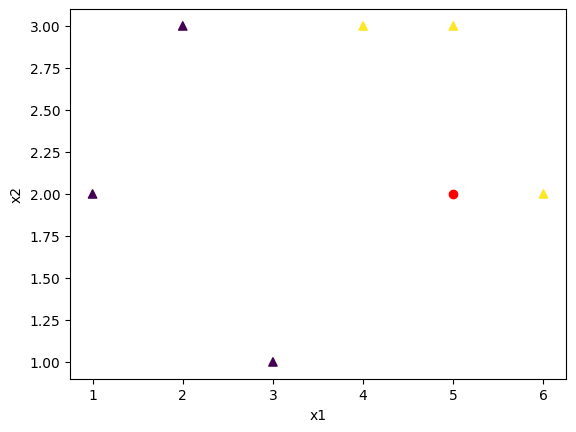

In [104]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [105]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))#.repeat()

## W, b 초기값 설정

In [106]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

## logistic regression function

In [107]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

\begin{align}
cost(h(x),y) = −log(h(x))\qquad if \quad y=1
\end{align}
\begin{align}
cost(h(x),y) = −log(1-h(x))\qquad if \quad y=0
\end{align}

- 위 두 수식을 하나의 수식으로 재표현
\begin{align}
cost(h(x),y) = -ylog(h(x))−(1-y)log(1-h(x))
\end{align}

## Loss function of logistic regression

In [108]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

## Function to calculate Accuracy

In [109]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

## Function to calculate Gradient

In [110]:
def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

## Train
- Test data -> 1로 추론 (정답)

In [111]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144
Testset Accuracy: 1.0000


# Logistic Regression을 통한 diabetes(당뇨병) 분류

In [112]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)
print(xy)

(759, 8) (759, 1)
[[-0.294118   0.487437   0.180328  ... -0.53117   -0.0333333  0.       ]
 [-0.882353  -0.145729   0.0819672 ... -0.766866  -0.666667   1.       ]
 [-0.0588235  0.839196   0.0491803 ... -0.492741  -0.633333   0.       ]
 ...
 [-0.411765   0.21608    0.180328  ... -0.857387  -0.7        1.       ]
 [-0.882353   0.266332  -0.0163934 ... -0.768574  -0.133333   0.       ]
 [-0.882353  -0.0653266  0.147541  ... -0.797609  -0.933333   1.       ]]


tensorflow dataset

In [116]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.random.normal((8, 1)), name='weight')
b = tf.Variable(tf.random.normal((1,)), name='bias')

## logistic regression function (위와 동일)

In [ ]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

In [118]:
## loss, accuracy, gradient function

In [119]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

## Train

In [123]:
EPOCHS = 1001

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))

Iter: 0, Loss: 0.6227
Iter: 100, Loss: 0.6170
Iter: 200, Loss: 0.6116
Iter: 300, Loss: 0.6064
Iter: 400, Loss: 0.6015
Iter: 500, Loss: 0.5968
Iter: 600, Loss: 0.5924
Iter: 700, Loss: 0.5881
Iter: 800, Loss: 0.5840
Iter: 900, Loss: 0.5802
Iter: 1000, Loss: 0.5765


# 더 생각해볼 주제

## tensorflow의 데이터 타입

In [22]:
import torch

In [23]:
tf_ = tf.constant([1,2,3,4])
np_ = np.array([1,2,3,4])
torch_ = torch.Tensor([1,2,3,4])
list_ = [1,2,3,4]

In [18]:
list_ + list_

[1, 2, 3, 4, 1, 2, 3, 4]

In [19]:
for x,y in zip(list_,list_):
    print(x + y)

2
4
6
8


In [24]:
tf_ + tf_, np_ * np_, torch_ + torch_

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([2, 4, 6, 8])>,
 array([ 1,  4,  9, 16]),
 tensor([2., 4., 6., 8.]))